# Plot up wind speed in NEMO forcing file

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import math
import numpy as np
import arrow
import cmocean

In [2]:
%matplotlib inline

## load data

In [3]:
ds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
ds

<xarray.Dataset>
Dimensions:    (gridX: 256, gridY: 266, time: 36384)
Coordinates:
  * time       (time) datetime64[ns] 2014-09-12 2014-09-12T01:00:00 ...
  * gridY      (gridY) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
  * gridX      (gridX) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
Data variables:
    atmpres    (time, gridY, gridX) float32 ...
    precip     (time, gridY, gridX) float32 ...
    qair       (time, gridY, gridX) float32 ...
    solar      (time, gridY, gridX) float32 ...
    tair       (time, gridY, gridX) float32 ...
    therm_rad  (time, gridY, gridX) float32 ...
    u_wind     (time, gridY, gridX) float32 ...
    v_wind     (time, gridY, gridX) float32 ...
Attributes:
    acknowledgement:           MEOPAR, ONC, Compute Canada, Environment Canada
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    coverage_content_type:     modelResult
    creator_email:             sallen@eos.ubc.ca
    creator_name: 

## Calculate wind speed.  

In [4]:
ds.u_wind

<xarray.DataArray 'u_wind' (time: 36384, gridY: 266, gridX: 256)>
[2477604864 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2014-09-12 2014-09-12T01:00:00 ...
  * gridY    (gridY) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
  * gridX    (gridX) float64 0.0 2.5e+03 5e+03 7.5e+03 1e+04 1.25e+04 ...
Attributes:
    _ChunkSizes:  [  1 266 256]
    level:        10 m above ground
    long_name:    U-Component of Wind
    short_name:   UGRD_10maboveground
    units:        m/s

### Calculate wind speed for April 08, 2015

In [5]:
u2_sub_day = ds.u_wind.sel(time = "2015-04-08")**2
v2_sub_day = ds.v_wind.sel(time = "2015-04-08")**2
wind_spd = np.sqrt(u2_sub_day + v2_sub_day)

In [6]:
sh = wind_spd.shape
sh


(24, 266, 256)

In [7]:
ds.u_wind.shape

(36384, 266, 256)

### wind_spd is now a 24x266x256 matrix

In [8]:
ly = wind_spd.shape[1]
lx = wind_spd.shape[2]

In [9]:
ly

266

In [10]:
lx

256

In [11]:
ds.u_wind.shape

(36384, 266, 256)

In [12]:
ds.u_wind.shape[1]

266

In [13]:
nt = ds.u_wind.shape[0]
ny = ds.u_wind.shape[1]
nx = ds.u_wind.shape[2]

In [14]:
nt

36384

In [15]:
ny

266

In [16]:
nx

256

### get stats on wind_spd

In [17]:
wind_mean = np.mean(wind_spd)

In [18]:
min_min = np.min(wind_spd)

In [19]:
wind_max = np.max(wind_spd)

## convert wind_spd to a numpy array in order to query values

In [20]:
wind_spd_np = np.copy(wind_spd)

In [21]:
wind_spd_np_3p = wind_spd_np[wind_spd_np > 3]

In [22]:
wind_spd_size = wind_spd_np.shape
wind_spd_size[2]

256

In [23]:
wind_spd_np_3p.shape

(501485,)

## test indexing required to identify number of days with winds greater than a threshold (3 m/s)

In [24]:
thresh = 3
wind_spd_ixiy = wind_spd_np[:,1,1]
wind_spd_ixiy_thresh = wind_spd_ixiy[wind_spd_ixiy > thresh]
wind_spd_ixiy_thresh.shape

(13,)

In [25]:
wind_spd_ixiy_thresh.size

13

In [26]:
wind_spd_ixiy.size

24

## Calculate percent time with winds greater than 10 m/s 

In [27]:
# "thresh": threshold of wind speed and 
# "total": the number of hours in a day 
# "it" : time index
tresh = 10
total = wind_spd_ixiy.size
nt    = 1
wind_spd_ixiy_percent = np.zeros((ny,nx))
for iy in range(0,wind_spd_size[1]):
    for ix in range(0,wind_spd_size[2]):
        wind_spd_ixiy = wind_spd_np[:,iy,ix]
        wind_spd_ixiy_thresh = wind_spd_ixiy[wind_spd_ixiy > thresh]
        wind_spd_ixiy_percent[iy,ix] = len(wind_spd_ixiy_thresh) / total


## Now plot up results
               

In [28]:
wind_spd_ixiy_percent.shape


(266, 256)

Text(0,0.5,'%')

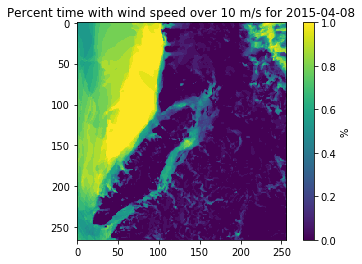

In [29]:
fig, ax = plt.subplots()
cax = ax.imshow(wind_spd_ixiy_percent)
ax.set_title('Percent time with wind speed over 10 m/s for 2015-04-08')
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.set_ylabel('%')